> **在数据分析中，文本数据是必须要学会处理的数据**

文本数据是我们必须要学会处理的数据，这个项目练习带大家做一些文本处理相关的练习，如：转换、替换、提取、词云等。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
movies = pd.read_csv("../data/ml-latest-small/movies.csv")
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


先来处理下缺失值，首先将体裁为null的数据删除。

In [3]:
movies.dropna(subset=["genres"], inplace=True)

## 将电影标题全部转换为小写

直接使用 `.str.lower()`即可。

In [4]:
movies.title.str.lower().head()

0                      toy story (1995)
1                        jumanji (1995)
2               grumpier old men (1995)
3              waiting to exhale (1995)
4    father of the bride part ii (1995)
Name: title, dtype: object

## 统计每部电影包含的体裁个数

每一部电影的体裁可能有多个，以 `|` 分隔，所以需要切分后统计个数。

In [5]:
movies.genres.map(lambda x: len(x.split("|"))).head()

0    5
1    3
2    2
3    3
4    1
Name: genres, dtype: int64

## 根据体裁生成多列数据

如果我们想根据体裁生成多列数据，直接使用 `.str.split` 即可，不过需要指定参数 `expand=True`。

In [6]:
movies.genres.str.split("|", expand=True).head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


## 替换体裁中的分隔符

有时候，需要替换分隔符，这时候，直接使用 `.str.replace` 即可。

例如这里将 `|` 替换为 `,`。

In [7]:
movies.genres.str.replace("|", ",").head()

0    Adventure,Animation,Children,Comedy,Fantasy
1                     Adventure,Children,Fantasy
2                                 Comedy,Romance
3                           Comedy,Drama,Romance
4                                         Comedy
Name: genres, dtype: object

## 从标题中提取出上映年份

标题中包括了上映年份，我们可以使用 `.str.extract` 提取出上映年份。

由于年份都是一系列的数字，所以正则可以直接用一个组，里面包括多个数字即可：`(\d+)`；同时，年份的前后分别是是小括号，所以最后的正则为：`\((\d+)\)`。

In [8]:
movies.title.str.extract("\((\d+)\)", expand=True).head()

,0
0,1995
1,1995
2,1995
3,1995
4,1995


## 去除标题年份

我们可以提取出标题中的年份，同样，我们也可以去除标题中的年份。使用 `.str.replace` 将年费替换成空字符串即可。

In [9]:
movies.title.str.replace("\(\d+\)", "").head()

0                      Toy Story 
1                        Jumanji 
2               Grumpier Old Men 
3              Waiting to Exhale 
4    Father of the Bride Part II 
Name: title, dtype: object

## 绘制电影体裁的词云

每一部电影都会有很多体裁，我们可以将他们汇总起来，然后通过词云工具绘画出体裁的分布情况。

先通过 `.str.cat` 来拼接所有的字符串。

In [10]:
ts = movies.genres.str.cat(sep=" ")

然后将拼接后的字符传入词云生成器中。

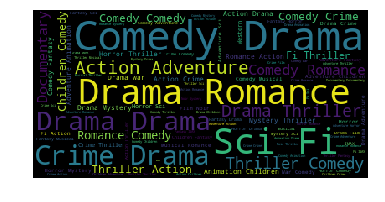

In [11]:
wc = WordCloud()

my_wc = wc.generate_from_text(ts)

plt.imshow(my_wc)
plt.axis("off")
plt.show()